# Convolutional Neural Network with Keras

### Classification problem of dog and cat images

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import pandas as pd
import os

% matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Convolution2D,Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model
from keras.regularizers import l2
from keras import backend as K

In [3]:
img_width, img_height = 75, 75

train_data_dir='~/study/data/animal_data/simple/train/'
validation_data_dir='~/study/data/animal_data/simple/validation/'

## data example

In [4]:
if K.backend() == 'tensorflow':
    K.clear_session()

In [5]:
dog_ex = np.random.choice(os.listdir(train_data_dir+'dog/'),1)[0]
cat_ex = np.random.choice(os.listdir(train_data_dir+'cat/'),1)[0]

In [6]:
load_img(train_data_dir+'dog/'+dog_ex, target_size=(75,75))

<PIL.Image.Image image mode=RGB size=75x75 at 0x7FAB9C9C6878>

In [7]:
load_img(train_data_dir+'cat/'+cat_ex, target_size=(75,75))

<PIL.Image.Image image mode=RGB size=75x75 at 0x7FAB9C9D17A0>

## Preprocessing

In [8]:
#rescale the pixel from [0,255] to [0,1] interval
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 5

train data preprocessing

In [9]:
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 20715 images belonging to 2 classes.


test data preprocessing

In [10]:
validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2500 images belonging to 2 classes.


## Conv Net
### Model Architecture

In [11]:
# a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers.
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(img_width, img_height,3)
              ,kernel_regularizer = l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)
          ,kernel_regularizer = l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)
         ,kernel_regularizer = l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
epochs = 20
train_samples = 20715 
validation_samples = 2500

In [15]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples // batch_size)

Epoch 1/20
4143/4143 [==============================] - 129s - loss: 0.6520 - acc: 0.6425 - val_loss: 0.7406 - val_acc: 0.4972
Epoch 2/20
4143/4143 [==============================] - 132s - loss: 0.6519 - acc: 0.6428 - val_loss: 0.7363 - val_acc: 0.4996
Epoch 3/20
4143/4143 [==============================] - 133s - loss: 0.6523 - acc: 0.6421 - val_loss: 0.7340 - val_acc: 0.4988
Epoch 4/20
4143/4143 [==============================] - 132s - loss: 0.6504 - acc: 0.6452 - val_loss: 0.7405 - val_acc: 0.5004
Epoch 5/20
4143/4143 [==============================] - 183s - loss: 0.6524 - acc: 0.6420 - val_loss: 0.7346 - val_acc: 0.4988
Epoch 6/20
4143/4143 [==============================] - 135s - loss: 0.6518 - acc: 0.6429 - val_loss: 0.7324 - val_acc: 0.5028
Epoch 7/20
4143/4143 [==============================] - 132s - loss: 0.6516 - acc: 0.6432 - val_loss: 0.7416 - val_acc: 0.4992
Epoch 8/20
4143/4143 [==============================] - 133s - loss: 0.6523 - acc: 0.6421 - val_loss: 0.7363 - 

In [16]:
model.save_weights('models/basic2_cnn_20_epochs.h5')

In [17]:
model.evaluate_generator(validation_generator, validation_samples)

[0.73692695015668874, 0.49984001179933546]

In [18]:
new_data_dir = 'data/animal_data/new/test'
test_list=os.listdir(new_data_dir)
img=load_img(new_data_dir+'/'+test_list[2], target_size=(75,75))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)


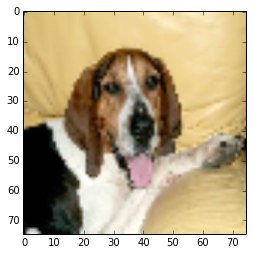

In [19]:
imshow(img)

In [20]:
model.predict_classes(x)
#cat 0, dog 1

1/1 [==============================] - 0s


array([[1]], dtype=int32)

## Data augmentation for improving the model
<br/>
by applying random transformation to our train set, we artificially enhance our dataset with new unseen images. 
They will hopefully reduce overfitting and allows better generalization capability for our network
### Random rotations 
Sometimes images in your smaple data may have varying and different rotations in the scene
You can train your model to better handle rotations of images by artificially and randomly rotating images from your dataset during training
### Random shifts
Objects in your images may not be centered in the frame. They may be off-center in various different ways
we can handle off-center objects by artifically creating shifted versions of your training data 
Keras supports separate horizontal and vertical random shifting of training data by the width_shift_range and height_shift_range arguments
### Random Flips 
another augmentation to your image data that can improve performance on large and complex problems is to create random flips of images in your training data
Keras supports random flipping along both the vertical and horizontal axes using the vertical_flip and horizontal_flip arguments

In [21]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [22]:
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 20715 images belonging to 2 classes.


In [23]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size,)

Epoch 1/20
4143/4143 [==============================] - 130s - loss: 0.6518 - acc: 0.6428 - val_loss: 0.7321 - val_acc: 0.5008
Epoch 2/20
4143/4143 [==============================] - 131s - loss: 0.6519 - acc: 0.6428 - val_loss: 0.7368 - val_acc: 0.4952
Epoch 3/20
4143/4143 [==============================] - 131s - loss: 0.6519 - acc: 0.6428 - val_loss: 0.7345 - val_acc: 0.5008
Epoch 4/20
4143/4143 [==============================] - 134s - loss: 0.6519 - acc: 0.6428 - val_loss: 0.7343 - val_acc: 0.5028
Epoch 5/20
4143/4143 [==============================] - 138s - loss: 0.6518 - acc: 0.6428 - val_loss: 0.7362 - val_acc: 0.4972
Epoch 6/20
4143/4143 [==============================] - 133s - loss: 0.6519 - acc: 0.6428 - val_loss: 0.7333 - val_acc: 0.5020
Epoch 7/20
4143/4143 [==============================] - 132s - loss: 0.6519 - acc: 0.6428 - val_loss: 0.7367 - val_acc: 0.5004
Epoch 8/20
4143/4143 [==============================] - 132s - loss: 0.6519 - acc: 0.6428 - val_loss: 0.7364 - 

In [24]:
model.evaluate_generator(validation_generator, validation_samples)

[0.73251177779436116, 0.50072001160979274]

validation accuracy is not that increasing

# Pretrained model

## AlexNet (2012)
- 2012년 ILSVRC에서 우승한 네트워크<br/><br/>
- 데이터 : 평균이미지를 입력 이미지에서 뺀 zero-centered image를 사용하였다.<br/><br/>
- activation function : ReLU (Vanishing gradient문제해결)<br/><br/>
- overlapping poolling : stride는 3 필터는 2로 정하여 pooling layer가 overlap되게 구성하였다.<br/><br/>
### Architecture
![alexnet](picture/alexnet.PNG)

[227x227x3]	INPUT
[55x55x96] CONV1	: 96@ 11x11, s = 4, p = 0
[27x27x96]	MAX POOL1	: 3x3, s = 2
[27x27x96]	NORM1	:
[27x27x256]	CONV2	: 256@ 5x5, s = 1, p = 2
[13x13x256] MAX POOL2	: 3x3, s = 2
[13x13x256] NORM2	:
[13x13x384] CONV3	: 384@ 3x3, s = 1, p = 1
[13x13x384] CONV4	: 384@ 3x3, s = 1, p = 1
[13x13x256] CONV5	: 256@ 3x3, s = 1, p = 1
[6x6x256] MAX POOL3	: 3x3, s = 2
[4096]	FC6	: 4096 neurons
[4096]	FC7	: 4096 neurons
[1000]	FC8	: 1000 neurons
<br/>
디테일한 정보는 다음과 같다.
- SGD사용, mini batch = 128
- momenum : 0.9, weight_decay(l2) : 0.0005
- weight initialization : zero-mean gaussian * 0.01
- dropout probability : 0.5
- learning rate : 0.01
- 7개의 cnn ensemble
- Data Augmentation : 원본 이지미는 256x256인데, 이를 224x224 패치가 되게 랜덤하게 추출한다. 이렇게 추출하면 한 개의 원본 이미지로 2048의 경우의 수가 나온다. 상하 대칭으로도 이미지를 똑같은 방법으로 추출한다. 테스트 단계에서는 원본, 상하반전 이미지에서 5개씩 224x224패치를 추출하여 softmax의 평균을 내어 추측한다. 
- PCA를 통해 테스트 이미지의 RGB 채널 강도를 변화시키는 augmentation을 진행한다.
<br/><br/>

[출처](http://nmhkahn.github.io/Casestudy-CNN)

Preprocessing

In [26]:
img_width, img_height = 227, 227

batch_size=3

train_data_dir='data/animal_data/simple/train/'
validation_data_dir='data/animal_data/simple/validation/'

In [27]:
train_datagen_augmented = ImageDataGenerator(
    featurewise_center=True,
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True)


Architecture

In [28]:
from keras.regularizers import l2

model = Sequential()
model.add(Conv2D(96, (11, 11), input_shape=(img_width, img_height,3)
                        ,kernel_regularizer = l2(0.0005),strides = (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

model.add(Conv2D(256, (5, 5), kernel_regularizer = l2(0.0005)))
model.add(ZeroPadding2D(padding=(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
          
model.add(Conv2D(384, (3, 3),kernel_regularizer = l2(0.0005)))
model.add(Activation('relu'))
model.add(Conv2D(384, (3, 3),kernel_regularizer = l2(0.0005)))
model.add(Activation('relu'))
model.add(Conv2D(384, (3, 3),kernel_regularizer = l2(0.0005)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096))         
model.add(Activation('relu'))
model.add(Dense(4096))         
model.add(Activation('relu'))
model.add(Dense(1000))         
model.add(Activation('relu'))
    
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
epochs = 20
train_samples = 26014
validation_samples = 3260

In [31]:
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 20715 images belonging to 2 classes.


In [32]:
validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2500 images belonging to 2 classes.


In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size,)

## VGGNet (2014)
- 2014 ILSVRC에서 GoogLeNet과 함께 높은 성능을 보인 네트워크 <br/><br/>
- 간단한 구조 단일 네트워크 등에서 좋은 성능등을 이유로 여러 분유에서 기본 네트워크로 많이 사용되고 있다.
- input : 224 x 224
- 전처리 : 트레이닝 전체의 RGB마다의 평균값을 이미지의 각 픽셀마다 빼서 zero-centered되게 했다.
- layer : VGG는 큰 필터를 사용했던 기존의 네트워크들과 다르게 모든 layer에서 가장 작은 크기의 필터를 사용한다.(3x3, s=1, p=1). 이 때 3x3으로 구성된 layer두개를 쌓으면 5x5와 동일한 성능을, 7x7은 레이어 3개를 쌓으면 같은 성능을 보인다. 
- 작은 크기의 필터를 사용하면 두가지 장점이 있다고 한다.
  1) **여러 개의 ReLU를 사용할 수 있다. ** 하나의 layer를 작은 필터를 가진 여러개의 레이터로 표현하였기 때문에 non-linearity가 적용될 곳이 더 많아진다.
  2) **학습해야할 weight수가 줄어든다***
  
- 추가적인 특징 : 2x2 max pool layer사용
- fc 4096-4096-1000, 마지막은 softmax function사용
- activation function으로 ReLU사용
![vgg](picture/vgg16_original.png)

keras에 정의된 vgg16 model

In [35]:
img_width, img_height = 150, 150

train_data_dir='data/animal_data/simple/train/'
validation_data_dir='data/animal_data/simple/validation/'

batch_size=3

In [36]:
model_vgg = applications.VGG16(include_top=False, weights='imagenet')

In [37]:
train_generator_bottleneck = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

validation_generator_bottleneck = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

Found 20715 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [38]:
epochs = 20
train_samples = 18650
validation_samples = 2500

vgg로 학습시키는 것은 매우 긴 과정이므로, VGG16에 대한 output을 먼저 저장한다

In [ ]:
bottleneck_features_train = model_vgg.predict_generator(train_generator_bottleneck, train_samples // batch_size)
np.save(open('models/bottleneck_features_train.npy', 'wb'), bottleneck_features_train)

In [ ]:
bottleneck_features_validation = model_vgg.predict_generator(validation_generator_bottleneck, validation_samples // batch_size)
np.save(open('models/bottleneck_features_validation.npy', 'wb'), bottleneck_features_validation)

In [41]:
train_data = np.load(open('models/bottleneck_features_train.npy', 'rb'))
train_labels = np.array([0] * (train_samples // 2) + [1] * (train_samples // 2))

validation_data = np.load(open('models/bottleneck_features_validation.npy', 'rb'))
validation_labels = np.array([0] * (validation_samples // 2) + [1] * (validation_samples // 2))

In [42]:
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(1, activation='sigmoid'))

model_top.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_top.fit(train_data, train_labels,
        epochs=epochs, 
        batch_size=batch_size,
        validation_data=(validation_data, validation_labels))

In [ ]:
model_top.save_weights('models/bottleneck_30_epochs.h5')

### Fine-tuning the top layers of a pre-trained network

In [ ]:
model_vgg = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

convolutional model의 젤 끝에 classifier model을 만든다. fine tuning을 위해서 먼저 완전히 train된 classifier의 weight를 이용하고 convolutional base에 수정한 classifier를 올린다.

In [ ]:
top_model = Sequential()
top_model.add(Flatten(input_shape=model_vgg.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

top_model.load_weights('models/bottleneck_30_epochs.h5')

#model_vgg.add(top_model)
model = Model(inputs = model_vgg.input, outputs = top_model(model_vgg.output))

**VGG16에서 layer개수 줄이기**<br/>
fine-tuning을 위해서 약간의 layer만 쓰고 싶다. 이 줄에서는 위 15개의 layer를 학습할 수 없게 설정한다.

In [ ]:
for layer in model.layers[:15]:
    layer.trainable = False

In [ ]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
# prepare data augmentation configuration  . . . do we need this?
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')


In [ ]:
# fine-tune the model
model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

In [ ]:
model.save_weights('models/finetuning_30epochs_vgg.h5')

In [ ]:
model.load_weights('models/finetuning_30epochs_vgg.h5')

In [ ]:
model.evaluate_generator(validation_generator, validation_samples)

## ResNet (2015)

MSRA에서 만든 ResNet은 2015sus ImageNet의 Classification, Detection, Localization부문에서 모두 1위를 차지했으며, 매우매우 깊은 layer를 자랑하는 네트워크이다.
[논문](https://arxiv.org/pdf/1512.03385.pdf)
- alexNet이 8개의 layer, VGG가 19개의 layer를 사용한데에 비해, ResNet은 152개의 layer를 사용하였다. 
- 네트워크의 layer가 깊어지만 **degradation**이라는 문제가 발생한다. 이는 네트워크가 깊어짐에 따라 training error자체가 높아지는 현상을 말한다.
![picture1](picture/resnet1.png)
- 이 문제를 해결하기 위해 VGGNet에서 학습 시킨 것과 같이 비교적 얕은 네트워크를 이용하여 일차적으로 학습시키고, 이를 깊은 넽,워크의 초기값으로 주어 학습시키는 방법을 사용할 수 잇지만, 시간이 오래 걸리는 단점이 있다. ResNet에서는 이 문제를 **Deep residual learning**이라는 학습법으로 해결하여 무려 152개의 layer를 쌋은 깊은 네트워크를 만들었다. 

### Residual block
- residual block은 아주 단순하게 layer를 학습시킨 결과에 이전의 input값을 단순히 더해줌으로써 학습을 한다.(기존의 f(x)에서 f(x)+x)
- 이를 통해서 gradient vanising문제를 거의 완전히 방지할 수 있으며 서로 다른 여러개의 모델을 학습(앙상블)시킨 효과가 나타난다고 한다.
![picture2](picture/resnet2.png)

### Deep Residual Learning
- 기본적인 주장은 더 깊은 네트워크는 얉은 네트워크가 학습할 수 있는 것들은 모두 학습할 수 있어야 한다: 추가적인 네트워크가 단순히 identity mapping만을 수행한다면, 더 깊은 네트워크는 얉은 네트워크와 동일하게 기능할 수 밖에 없다.
- 깊은 네트워크는 그들의 identity transform을 찾는데 오랜시간이 걸리기 때문에, identity transform을 만든다. 즉, layer는 identity transform을 추가하기 위해 residual function을 학습한다. identity transform만 수행하므로서, 네트워크는 F(x)안에서 weight를 0으로 만들고자 하면 된다. 
![residual_net](picture/alexnet.PNG)
- ResNet은 직적 activation을 수행하는 weight를 학습하는 것이 아니라 input과 output의 차이인 residual을 학습시키는 방식이다. 기존의 AlexNet과, VGG, GoogLeNet은 Convolution을 통해 tensor(feature map)을 변형시켜 왔지만 ResNet은 input에 추가적인 값을 conv로 학습시킨다. gradient가 additive하게 흐르는 것을 skip connection이라고 논문에서 표현한다.<br/>
- 또한 부가적으로 CNN을 깊이 쌓으면서 ResNet에서는 Fully Connected layer를 사용하지 않았다. 이는 모델의 파라미터를 줄이는 데 도움이 되었다. <br/>
[참고1](https://matrixmashing.wordpress.com/2016/01/29/interpretating-deep-residual-learning-blocks-as-locally-recurrent-connections/)
[참고2](http://tmmse.xyz/2016/10/15/lstm-resnet/)

In [47]:
img_width, img_height = 224, 224

train_data_dir='data/animal_data/simple/train/'
validation_data_dir='data/animal_data/simple/validation/'

batch_size=5

In [ ]:
model_resnet = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
epochs = 20
train_samples = 24479 
validation_samples = 3129 

In [ ]:
model_resnet.output_shape

In [ ]:
top_model = Sequential()
top_model.add(Flatten(input_shape=model_resnet.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(1, activation='sigmoid'))

#top_model.add(Dense(1, activation='sigmoid'))

#model_vgg.add(top_model)
model = Model(inputs = model_resnet.input, outputs = top_model(model_resnet.output))

In [ ]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
# prepare data augmentation configuration  . . . do we need this?
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')


In [ ]:
# fine-tune the model
model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

In [ ]:
model.save_weights('models/finetuning_30epochs_resnet.h5')

In [ ]:
model.load_weights('models/finetuning_30epochs_resnet.h5')

In [ ]:
model.evaluate_generator(validation_generator, validation_samples)